# Belgium Rail Network EDA
Exploring GTFS data for NMBS/SNCB rail network.

In [7]:
# Import libraries
import networkx as nx
import pandas as pd
import partridge as ptg
import folium
import matplotlib.pyplot as plt  # Optional for static plots

In [ ]:
from partridge import load_feed

gtfs_path = "data"  # Path to your data folder
feed = load_feed(gtfs_path)
stops = feed.stops

m = folium.Map(location=[50.85, 4.35], zoom_start=8)  # Centered on Belgium
for _, stop in stops.iterrows():
    folium.CircleMarker(
        location=[stop["stop_lat"], stop["stop_lon"]],
        radius=2,
        popup=stop["stop_name"],
        color="blue",
        fill=True
    ).add_to(m)
m.save("plots/belgium_stations_map.html")
print("Map saved as 'belgium_stations_map.html'.")

Map saved as 'belgium_stations_map.html'. Open it in a browser!


c:\Users\KIIT\Downloads\belgium-rail-gtfs\myenv\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\KIIT\Downloads\belgium-rail-gtfs\myenv\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\KIIT\Downloads\belgium-rail-gtfs\myenv\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\KIIT\Downloads\belgium-rail-gtfs\myenv\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', 

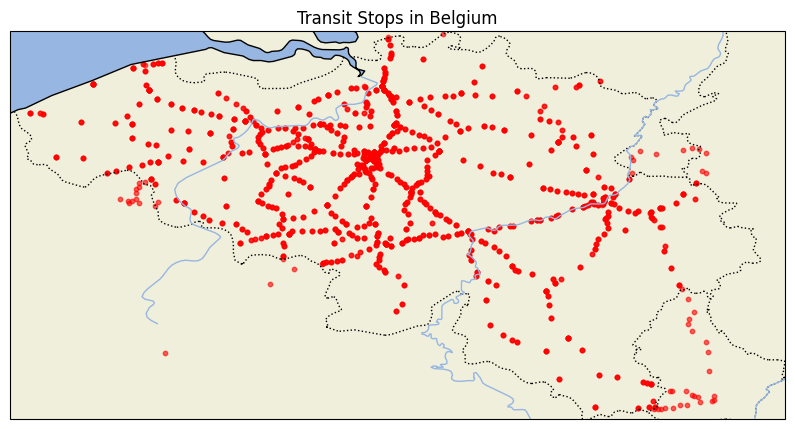

In [16]:
from partridge import load_feed
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

gtfs_path = "data"  # Path to your data folder
feed = load_feed(gtfs_path)
stops = feed.stops

# Create a map centered on Belgium
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([2.5, 6.5, 49.5, 51.5])  # Belgium bounds (lon, lat)

# Add map features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS)

# Plot stops
ax.scatter(stops["stop_lon"], stops["stop_lat"], s=10, c="red", alpha=0.6, transform=ccrs.PlateCarree())

plt.title("Transit Stops in Belgium")
plt.show()  # This will display the static map with stops overlaid in the notebook